<a href="https://colab.research.google.com/github/ishankarve/upgrad_lending_club_case_study/blob/main/Ishan%20Karve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lendig Club Case Study Aim:
##### Identify risky loan applications.

###### Main Stages of the project:
  1. Data Understandng
  2. Data Cleaning
  3. Data Analysis
  4. Recommendations

###### Data Understanding:
discovery of the dataset's structure, variables, and meaning by reading the data variables and dataset dictionary. Understanding the context of the data, its sources, and how it's organized.


###### Data Cleaning:
1. Calculate the precentage of the Missing Values in the dataset.
2. Eliminate columns with excessively high missing value percentages, as they may not provide meaningful insights.
3. For columns with acceptable missing percentages, employ imputation techniques to fill in missing data.
4. Exclude rows with very high missing value percentages to maintain data integrity.

###### Data Analysis:
1. Identify applicant-related variables, such as demographics and financial history.
2. Examine loan characteristics, including loan amount, interest rates, and terms.
3. Explore customer behavior variables that may indicate creditworthiness or default tendencies.
4. Exclude rows with 'current' loan status, as they don't provide conclusive default information because only the Charged-off is marked as 'default'.
5. Focus on customer behavior variables available at the time of application, prioritizing those accessible via credit bureaus for comprehensive analysis.

###### Recommendations:
Based on our analysis, we can make some suggestions to reduce the risk of loan defaults. These could involve improving how we decide who gets a loan, changing the rules for who can borrow, or using better tools to predict who might not pay back their loans.

#### Import Libraries and load Dataset

In [1]:
#import the required libraries
import numpy as np ## package for numerical computing
import seaborn as sb ## Python data visualization library based on Matplotlib
import matplotlib.pyplot as plt ##comprehensive library for creating static, interactive, and animated visualizations in Python.
import pandas as pd ##library for data manipulation and analysis


In [2]:
#read the given data file using pandas to a dataframe
loan = pd.read_csv("./loan.csv",engine='python')

#### Gain insights of the datasets

In [3]:
#get the shape of the data frame (number of rows,number of columns)
loan.shape

(39717, 111)

In [4]:
#get the list of columns
print(loan.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [ ]:
#sample the dataframe (this will show first 100 rows with all the coulmns)
loan.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
#get list of unique variables in each column
print(loan.nunique())

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [8]:
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Start cleaning the data

In [9]:
# get number of non NA values across all columns (so we can process the Missing values)
print(loan.apply(lambda x: x.count(), axis=0))

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


##### Create individual dataframes based on loan status [charged-off,current,fully paid]

In [10]:
multiple_loans = (loan.groupby('member_id').size() > 1).any()

if multiple_loans:
    print("There are multiple loans per customer.")
else:
    print("The database has one unique loan per customer.")

The database has one unique loan per customer.


In [11]:
#since the project is based on knowing the risky cases, we need to overview the loanstatuses counts in the database.
#get list of loan statuses
print(loan.loan_status.value_counts())

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [12]:
#dataframe before dropping NA columns
print(loan.shape)

(39717, 111)


In [13]:
#drop all columns where count is zero
#how='all' will Specifies that only columns where all values are missing should be dropped.
# If any value in a column is present (non-missing), the column will be retained.
loan.dropna(how='all', axis=1, inplace=True)


In [14]:
#dataframe after dropping NA columns (columns that all its values is NA)
print(loan.shape)

(39717, 57)


In [15]:
#drop all columns where number of unique values is only one
for el in loan.columns:
    if (loan[el].nunique()==1):
        loan.drop([el], axis = 1,inplace=True)

In [16]:
#dataframe after dropping columns that has number of unique values is one
print(loan.shape)

(39717, 48)


In [17]:
#check the columns retained
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


In [18]:
#in our case study ID and member_id columns are indeed irrelevant
loan.drop(columns=['id', 'member_id'], inplace=True)


In [19]:
loan.apply(lambda x: x.count(), axis=0)

loan_amnt                  39717
funded_amnt                39717
funded_amnt_inv            39717
term                       39717
int_rate                   39717
installment                39717
grade                      39717
sub_grade                  39717
emp_title                  37258
emp_length                 38642
home_ownership             39717
annual_inc                 39717
verification_status        39717
issue_d                    39717
loan_status                39717
url                        39717
desc                       26775
purpose                    39717
title                      39706
zip_code                   39717
addr_state                 39717
dti                        39717
delinq_2yrs                39717
earliest_cr_line           39717
inq_last_6mths             39717
mths_since_last_delinq     14035
mths_since_last_record      2786
open_acc                   39717
pub_rec                    39717
revol_bal                  39717
revol_util

#### Start Cleaning actual data within columns

In [20]:
#check term column
loan.term.value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [26]:
#remove the text month and convert the column to int
loan.term=loan.term.apply(lambda x : int(x.replace("months", "")))

AttributeError: 'int' object has no attribute 'replace'

In [27]:
#check again
loan.term.value_counts()

term
36    29096
60    10621
Name: count, dtype: int64

In [28]:
#remove the percentage sign and convert the column to float for the column int_rate
loan.int_rate=loan.int_rate.apply(lambda x : float(x.replace("%", "")))

AttributeError: 'float' object has no attribute 'replace'

In [29]:
#check count value of int_rate
loan.int_rate.value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [30]:
#repeat the process of converting for the column revol_util
loan.revol_util=loan.revol_util.apply(lambda x : float(str(x).replace("%", "")))

In [31]:
#check count value of revol_util
loan.revol_util.value_counts()
#values showing without % so the conversion is ok.

revol_util
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [32]:
#pandas convert datetime for column "issue_d"
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y') #date is( May-10 ) format

In [33]:
#validate conversion
print(loan['issue_d'])

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]


In [34]:
#also convert the column "earliest_cr_line"
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y') #date is( May-10) format

In [35]:
#validate conversion
print(loan['earliest_cr_line'] )

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]


In [36]:
#Splitting date fields into separate components, such as year, month, and day, can often lead to better analysis for several reasons:
#Visualization, Aggregation and Grouping,Comperative Analysis
#-----------------------
#split for column earliest_cr_line
loan['earliest_cr_line_month']=pd.DatetimeIndex(loan['earliest_cr_line']).month
loan['earliest_cr_line_year']=pd.DatetimeIndex(loan['earliest_cr_line']).year


In [37]:
#again split for column issue_d
loan['issue_d_month']=pd.DatetimeIndex(loan['issue_d']).month
loan['issue_d_year']=pd.DatetimeIndex(loan['issue_d']).year

In [38]:
#validate
print(loan['issue_d_month'])

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_d_month, Length: 39717, dtype: int32


In [51]:
#delete all rows where loan status is current
#its better to exclude loans with a status of "Current" from the analysis.the reasons:
#Focus on Defaulters: The primary objective is to understand the driving factors behind loan defaults (i.e., borrowers who fail to repay), as they cause the largest amount of loss to the lender. Excluding "Current" loans allows for a more focused analysis on loans with known outcomes (i.e., fully paid or charged-off).
#Incomplete Information: Current loans are still in progress, and their final outcome is uncertain. Including them in the analysis may introduce noise and ambiguity, as the final status (fully paid or charged-off) has not yet been determined.

loan=loan[(loan.loan_status!="Current")]

In [52]:
print(loan.shape)

(38577, 50)


In [41]:
#remove years from the emp_length for better analytics behaviour.
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" years", ""))
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace(" year", ""))

In [42]:
loan.emp_length.value_counts()

emp_length
10+    8488
< 1    4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
nan    1033
Name: count, dtype: int64

In [43]:
#convert from the less than 1 to zero for better analysis result
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("< 1", "0"))

In [44]:
#remove + from emp_length
loan.emp_length=loan.emp_length.apply(lambda x : str(x).replace("10+", "10"))

In [45]:
#convert loan_status to a binary value column (0 for fully paid and 1 for the charged-off)
loan.loan_status=loan.loan_status.apply(lambda x : 1 if x=="Fully Paid" else 0)

In [53]:
loan.loan_status.value_counts()

loan_status
1    32950
0     5627
Name: count, dtype: int64

In [54]:
print(loan.nunique())

loan_amnt                    870
funded_amnt                 1019
funded_amnt_inv             8050
term                           2
int_rate                     370
installment                15022
grade                          7
sub_grade                     35
emp_title                  28027
emp_length                    12
home_ownership                 5
annual_inc                  5215
verification_status            3
issue_d                       55
loan_status                    2
url                        38577
desc                       25802
purpose                       14
title                      19297
zip_code                     822
addr_state                    50
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21275
revol_util

In [48]:
#create sub dataframe based on loan status filter
#loan_fully_paid: Contains rows where the loan_status is equal to 1, indicating fully paid loans.
#loan_charged_off: Contains rows where the loan_status is equal to 0, indicating charged off loans.
loan_fully_paid=loan[(loan.loan_status==1)]
loan_charged_off=loan[(loan.loan_status==0)]


In [49]:
#check size
print(loan_fully_paid.shape)

(32950, 50)


In [50]:
#check size for defaulters
print(loan_charged_off.shape)

(5627, 50)


### Data Analysis

In [55]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,...,0.00,Jan-15,171.62,NaN,May-16,0.0,1,1985,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,1.11,Apr-13,119.66,NaN,Sep-13,0.0,4,1999,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,...,0.00,Jun-14,649.91,NaN,May-16,0.0,11,2001,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,0.00,Jan-15,357.48,NaN,Apr-16,0.0,2,1996,12,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,0.00,Jan-15,161.03,NaN,Jan-16,0.0,11,2004,12,2011


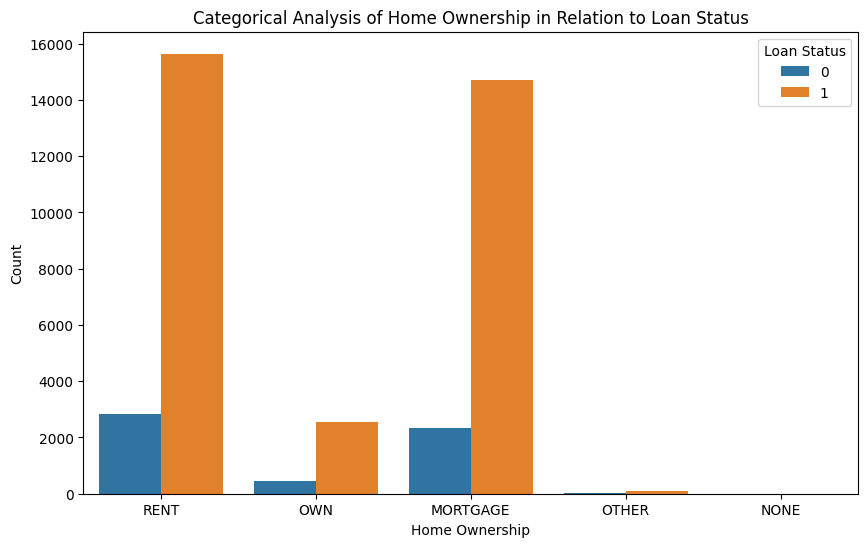

In [58]:
#Here's a different approach to visualize the categorical analysis of home ownership and loan purpose in relation to loan status using bar plots:
# categorical analysis of home ownership
plt.figure(figsize=(10, 6))
sb.countplot(data=loan, x='home_ownership', hue='loan_status')
plt.title('Categorical Analysis of Home Ownership in Relation to Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


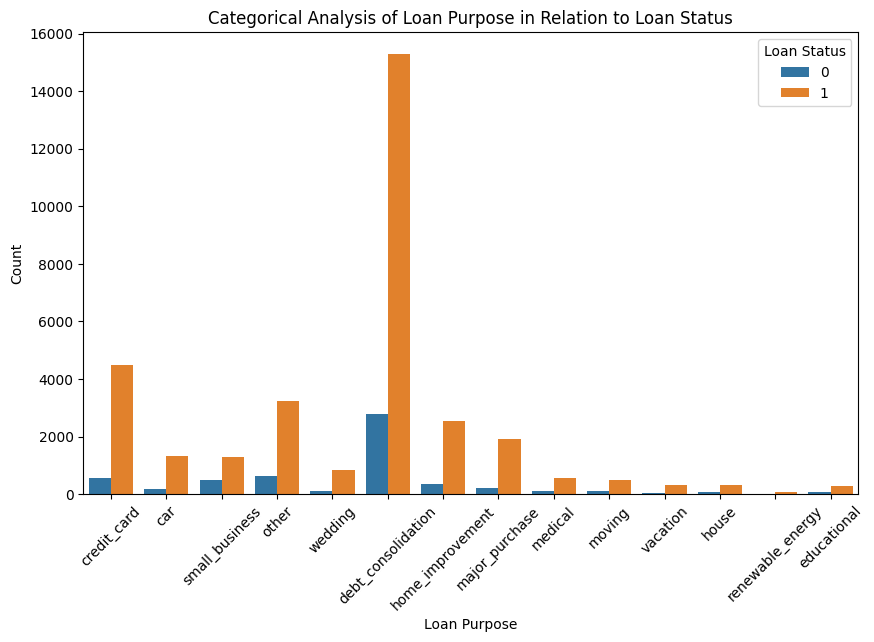

In [60]:

# categorical analysis of loan purpose
plt.figure(figsize=(10, 6))
sb.countplot(data=loan, x='purpose', hue='loan_status')
plt.title('Categorical Analysis of Loan Purpose in Relation to Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


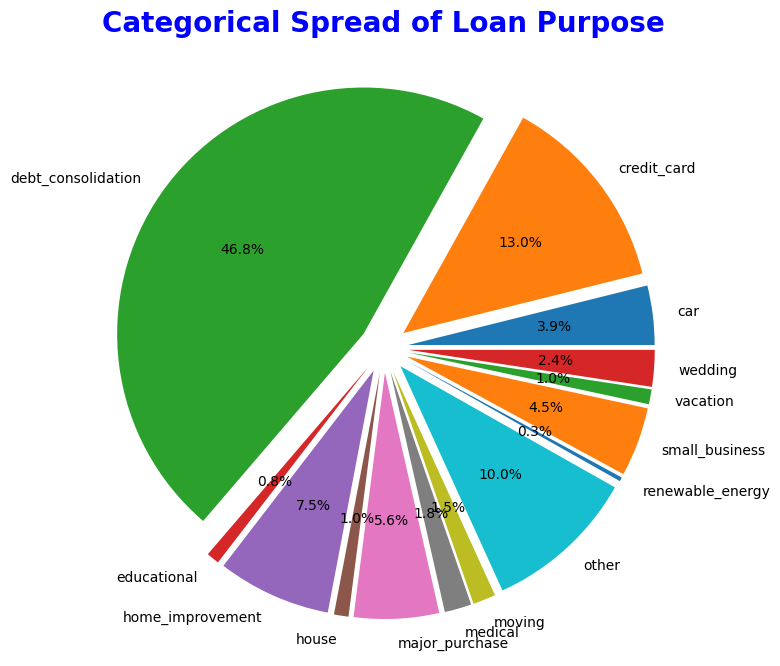

In [61]:
loan_purpose_df = loan.groupby('purpose').size()

# Plotting pie chart for different types of purposes
explode = [0.1] * len(loan_purpose_df)  # Explode each slice for better visualization
plt.figure(figsize=(8, 8))
plt.pie(loan_purpose_df, labels=loan_purpose_df.index, autopct='%1.1f%%', explode=explode)
plt.title("Categorical Spread of Loan Purpose", color='blue', fontweight='bold', fontsize=20)
plt.show()

###purpose with funded amount

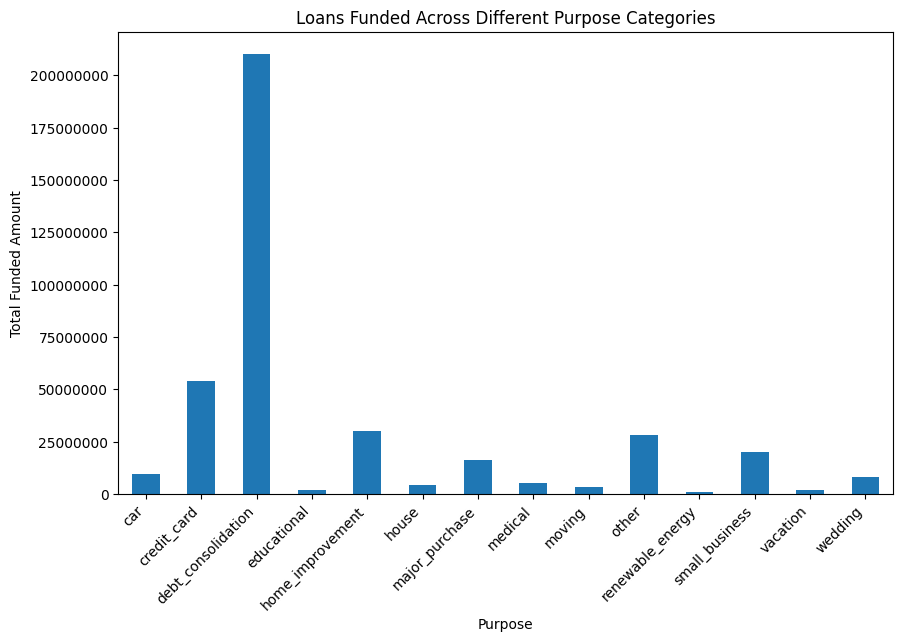

In [66]:

#This code generates a bar chart showing the total funded amount across different purpose categories.
#Each bar represents the total funded amount for a specifec loan purpose category.
#The x-axis shows the loan purpose categories, and the y-axis shows the total funded amount.
#The x-axis labels are rotated for better readability
loan_purpose_df_consolidated = loan.groupby('purpose')['funded_amnt_inv'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
loan_purpose_df_consolidated.plot(kind="bar", title="Loans Funded Across Different Purpose Categories")
plt.xlabel("Purpose")
plt.ylabel("Total Funded Amount")
plt.xticks(rotation=45, ha="right")  # Rotating x-axis labels for better readability
plt.gca().yaxis.get_major_formatter().set_scientific(False)  # Disable scientific notation for y-axis
plt.show()

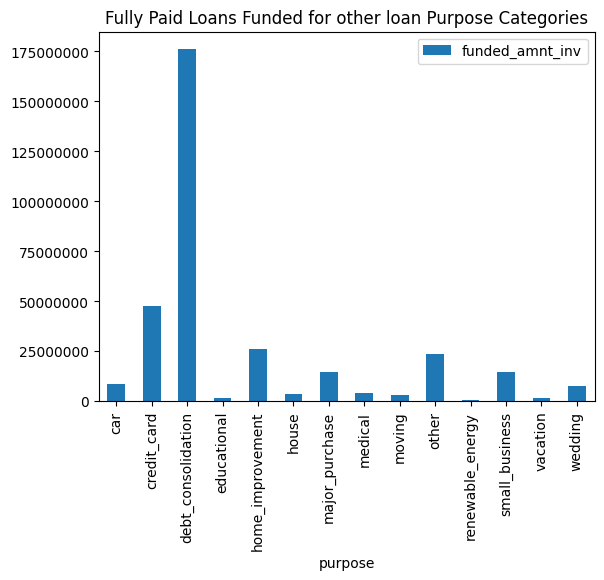

In [67]:

loan_purpose_df_paidoff = loan_fully_paid.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded for other loan Purpose Categories")
plt.xticks(horizontalalignment="center")
#  show information for 1,000,000 $
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

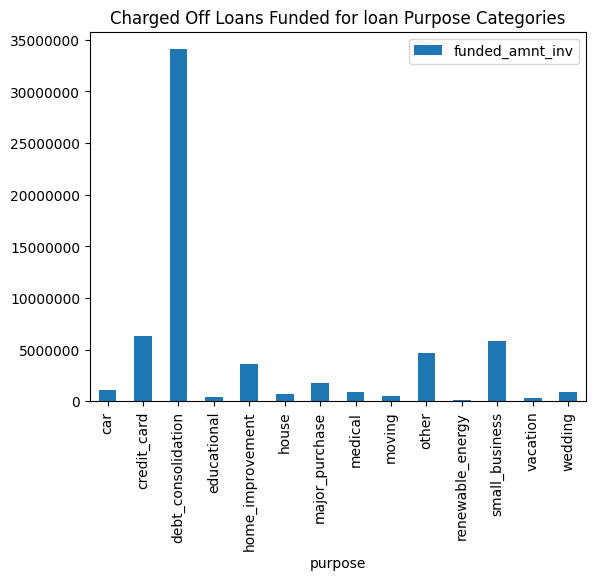

In [68]:

loan_purpose_df_defaulted = loan_charged_off.groupby('purpose')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded for loan Purpose Categories")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**###Home ownership with funded amount **

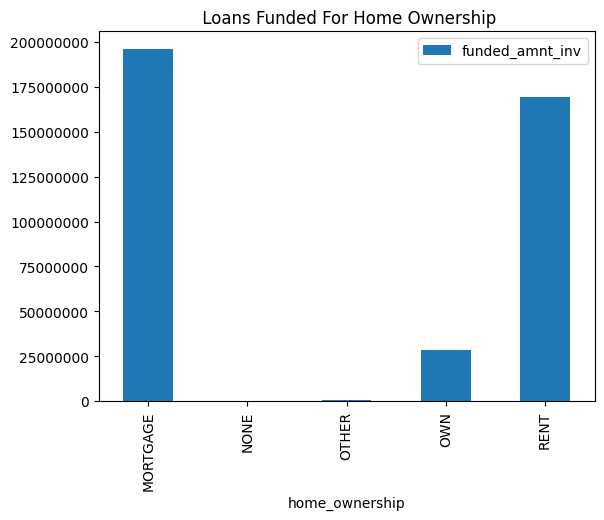

In [69]:
## the other side is homeOwnership
## now here is the result for this data
loan_purpose_df_consolidated = loan.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_consolidated.plot(kind="bar", title=" Loans Funded For Home Ownership")
plt.xticks(horizontalalignment="center")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


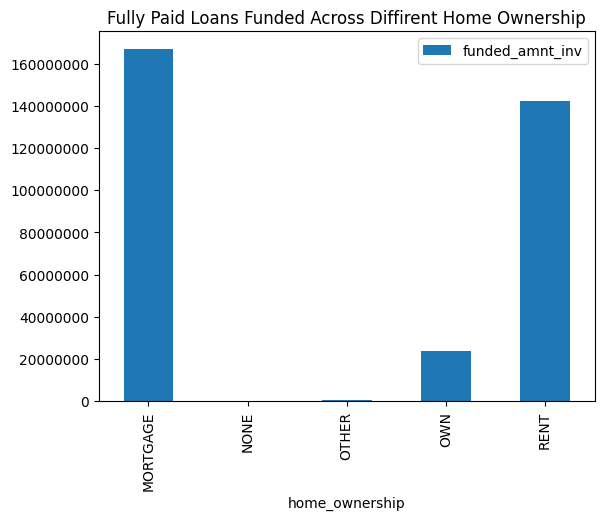

In [71]:

loan_purpose_df_paidoff = loan_fully_paid.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_paidoff.plot(kind="bar", title="Fully Paid Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()


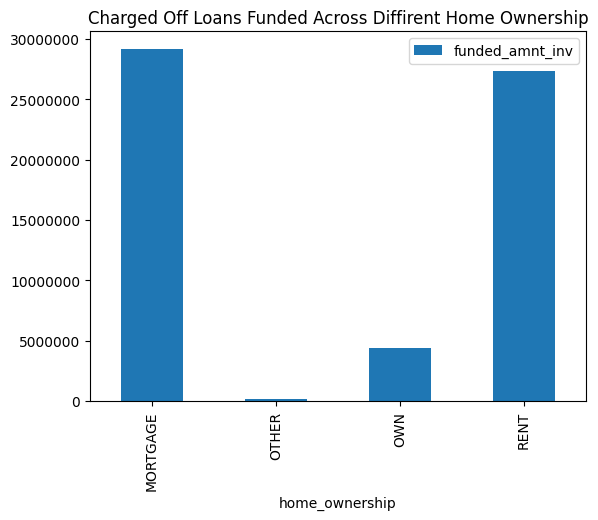

In [72]:



loan_purpose_df_defaulted = loan_charged_off.groupby('home_ownership')[['funded_amnt_inv']].sum()
loan_purpose_df_defaulted.plot(kind="bar", title="Charged Off Loans Funded Across Diffirent Home Ownership")
plt.xticks(horizontalalignment="center")
# Modifying the ticks to show information in (million dollars)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

##### performs an analysis of the impact of state on the percentage of total loan paid.


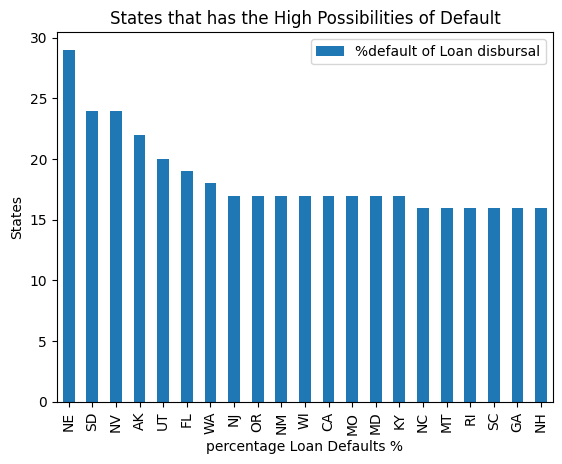

In [89]:
func = lambda x: np.sum(x) / 10000  # Divide by 10,000 for better readability

# Create a pivot table to analyze the impact of state on percentage of total loan paid
raw_table = pd.pivot_table(loan, index='addr_state', columns='loan_status', values='funded_amnt_inv', aggfunc=func)

# Calculate percentage of defaults out of total defaults and total loan disbursal
raw_table["%default of total default"] = round((raw_table[0] / raw_table[0].sum()) * 100)
raw_table["%default of Loan disbursal"] = round((raw_table[0] / (raw_table[1] + raw_table[0])) * 100)

# Filter states with high possibility of default (percentage of defaults > 15%) and sort them
state_default = raw_table[raw_table["%default of Loan disbursal"] > 15].sort_values(by='%default of Loan disbursal', ascending=False)

# Plot relevant graph
state_default.plot(kind='bar', xlabel='percentage Loan Defaults %', ylabel='States', y='%default of Loan disbursal')
plt.title("States that has the High Possibilities of Default")
plt.show()

In [74]:
print(state_default)

loan_status            0            1  %default of total default  \
addr_state                                                         
NE              0.162499     0.388542                        0.0   
SD             13.917500    43.285071                        0.0   
NV            114.309711   364.807239                        2.0   
AK             19.540407    68.928862                        0.0   
UT             49.587642   204.655093                        1.0   
FL            505.771461  2200.431015                        8.0   
WA            145.313609   664.969282                        2.0   
NJ            318.082474  1604.969760                        5.0   
OR             74.327973   351.390048                        1.0   
NM             28.675743   138.124417                        0.0   
WI             76.977042   372.920438                        1.0   
CA           1227.260505  6002.246090                       20.0   
MO            114.786831   560.498093           

In [ ]:
##"Loan disbursal" refers to the act of releasing the loan funds to the borrower.
## When a loan is disbursed, the lender transfers the agreed-upon loan amount to the borrower's account or otherwise provides the funds to the borrower.

loan_status         0         1  %default of total default  \
zip_code                                                     
438xx        3.161106  1.100000                        0.0   
746xx        5.297500  1.919300                        0.0   
496xx        4.095000  1.712500                        0.0   
673xx        1.200000  0.496058                        0.0   
561xx        4.509597  1.962500                        0.0   
203xx        1.575000  0.715000                        0.0   
608xx        4.677500  2.176444                        0.0   
215xx        2.200000  1.110000                        0.0   
371xx        0.960000  0.486209                        0.0   
668xx        2.500000  1.315000                        0.0   
798xx        1.475875  0.803948                        0.0   
593xx        2.000000  1.075732                        0.0   
897xx        4.087500  2.484997                        0.0   
758xx        2.200000  1.457500                        0.0   
755xx   

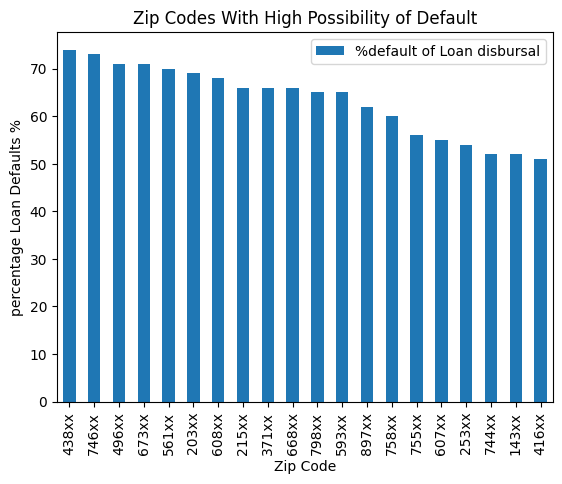

In [93]:
#analyse impact of zipcode on percentage of total loan paid *****
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='zip_code',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%default of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
zip_default=raw_table[raw_table["%default of Loan disbursal"]>50].sort_values(by='%default of Loan disbursal', ascending=False)
print (zip_default)
#plot relevant graphs
zip_default.plot(kind='bar', ylabel='percentage Loan Defaults %', xlabel='Zip Code', y='%default of Loan disbursal')
plt.title("Zip Codes With High Possibility of Default")
plt.show()

##### perofrm analysis of impact of loan purpose on loan default



loan_status                   0             1  %default of total default  \
purpose                                                                    
small_business       585.444310   1444.905545                       10.0   
educational           36.589579    145.870416                        1.0   
renewable_energy      14.399654     62.479715                        0.0   
medical               85.779975    432.055454                        1.0   
other                463.938806   2344.855589                        8.0   
debt_consolidation  3408.223495  17613.126275                       56.0   
house                 70.016359    363.699906                        1.0   
vacation              29.910826    162.800680                        0.0   
moving                50.911467    305.240846                        1.0   
credit_card          629.423719   4753.221928                       10.0   
home_improvement     362.383913   2633.062787                        6.0   
car         

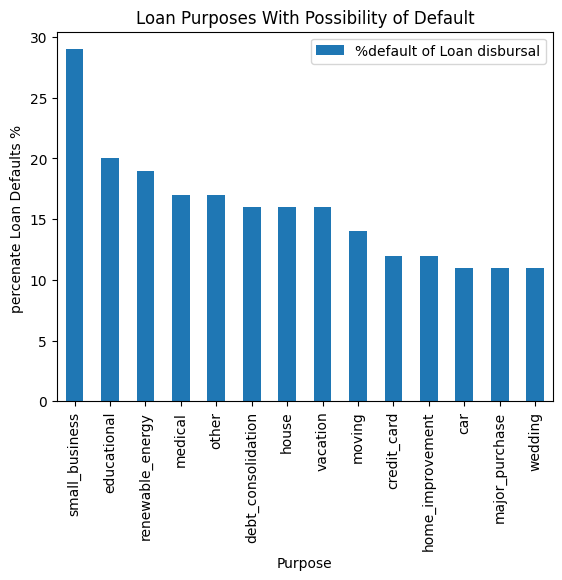

In [94]:
# Define a function to aggregate loan amount
func = lambda x: np.sum(x) / 10000  # Divide by 10,000 for better readability

# Create a pivot table to analyze the impact of loan purpose on percentage of total loan paid
raw_table = pd.pivot_table(loan, index='purpose', columns='loan_status', values='funded_amnt_inv', aggfunc=func)

# Calculate percentage of defaults out of total defaults and total loan disbursal
raw_table["%default of total default"] = round((raw_table[0] / raw_table[0].sum()) * 100)
raw_table["%default of Loan disbursal"] = round((raw_table[0] / (raw_table[1] + raw_table[0])) * 100)

# Sort by percentage of defaults in descending order
purpose_default = raw_table.sort_values(by='%default of Loan disbursal', ascending=False)

# Print the sorted table
print(purpose_default)

# Plot relevant graph
purpose_default.plot(kind='bar', ylabel='percenate Loan Defaults % ', xlabel='Purpose', y='%default of Loan disbursal')
plt.title("Loan Purposes With Possibility of Default")
plt.show()

#### Perofrm analysis on the impact of *verification* on loan default

loan_status             0      1  %default of total default  \
verification_status                                           
Verified             2051  10155                       36.0   
Source Verified      1434   8243                       25.0   
Not Verified         2142  14552                       38.0   

loan_status          %default of Loan disbursal  
verification_status                              
Verified                                   17.0  
Source Verified                            15.0  
Not Verified                               13.0  


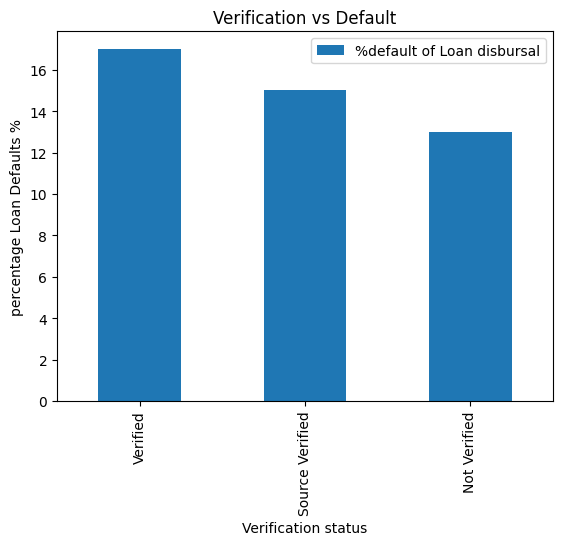

In [98]:
# Define a function to aggregate loan amount
func = lambda x: np.sum(x) / 10000  # Divide by 10,000 for better readability

# Create a pivot table to analyze the impact of verification status on percentage of total loan paid
raw_table = pd.pivot_table(loan, index='verification_status', columns='loan_status', values='funded_amnt_inv', aggfunc='count')

# Calculate percentage of defaults out of total defaults and total loan disbursal
raw_table["%default of total default"] = round((raw_table[0] / raw_table[0].sum()) * 100)
raw_table["%default of Loan disbursal"] = round((raw_table[0] / (raw_table[1] + raw_table[0])) * 100)

# Sort by percentage of defaults in descending order
verification_default = raw_table.sort_values(by='%default of Loan disbursal', ascending=False)

# Print the sorted table
print(verification_default)

# Plot relevant graph
verification_default.plot(kind='bar', ylabel='percentage Loan Defaults %', xlabel='Verification status', y='%default of Loan disbursal')
plt.title("Verification vs Default")
plt.show()

#### Perfrom analysis on the impact of loan grade on default

loan_status            0             1  %default of total default  \
grade                                                               
A             441.974198   7742.303800                        7.0   
B            1388.838582  10452.996513                       23.0   
C            1314.487469   6401.156013                       22.0   
D            1215.562461   4491.693123                       20.0   
E            1024.339567   2777.616785                       17.0   
F             558.753605   1062.364411                        9.0   
G             169.510267    393.668636                        3.0   

loan_status  %default of Loan disbursal  
grade                                    
A                                   5.0  
B                                  12.0  
C                                  17.0  
D                                  21.0  
E                                  27.0  
F                                  34.0  
G                                  30.0  


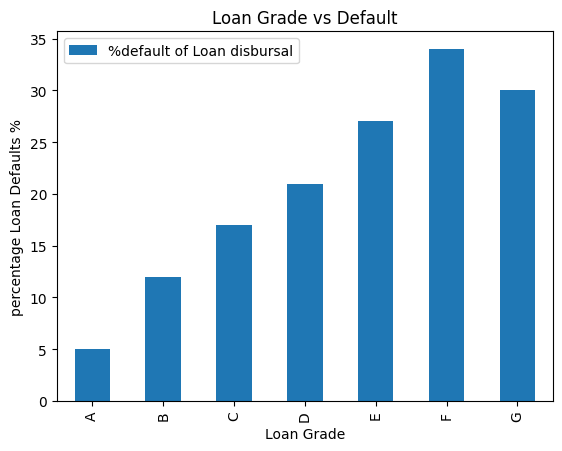

In [104]:
# Define a function to aggregate loan amount
func = lambda x: np.sum(x) / 10000  # Divide by 10,000 for better readability

# Create a pivot table to analyze the impact of loan grade rating on percentage of total loan paid
raw_table = pd.pivot_table(loan, index='grade', columns='loan_status', values='funded_amnt_inv', aggfunc=func)

# Calculate percentage of defaults out of total defaults and total loan disbursal
raw_table["%default of total default"] = round((raw_table[0] / raw_table[0].sum()) * 100)
raw_table["%default of Loan disbursal"] = round((raw_table[0] / (raw_table[1] + raw_table[0])) * 100)

# Sort by loan grade in ascending order
loan_grade_default = raw_table.sort_values(by='grade', ascending=True)

# Print the sorted table
print(loan_grade_default)

# Plot relevant graph
loan_grade_default.plot(kind='bar', ylabel='percentage Loan Defaults %', xlabel='Loan Grade', y='%default of Loan disbursal')
plt.title("Loan Grade vs Default")
plt.show()

####Perform analysis by sub grade

loan_status           0            1  %default of total default  \
sub_grade                                                         
F5           103.962321   106.589469                        2.0   
F4            96.992345   148.889053                        2.0   
G3            32.608680    52.444542                        1.0   
G5            16.637432    36.076576                        0.0   
F1           162.578799   339.602457                        3.0   
G2            46.062962   100.716229                        1.0   
G1            54.581942   121.754863                        1.0   
F2           111.051688   260.558081                        2.0   
F3            84.168451   206.725351                        1.0   
E4           181.198661   450.425353                        3.0   
E5           182.684774   458.606884                        3.0   
E1           273.295567   705.291147                        4.0   
E2           226.867999   607.470135                        4.

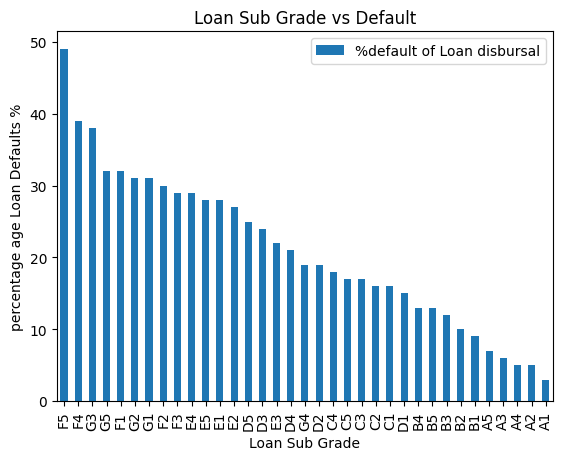

<Figure size 27700x800 with 0 Axes>

In [108]:
# Define a function to aggregate loan amount
func = lambda x: np.sum(x) / 10000  # Divide by 10,000 for better readability

# Create a pivot table to analyze the impact of loan sub-grade on percentage of total loan paid
raw_table = pd.pivot_table(loan, index=['sub_grade'], columns='loan_status', values='funded_amnt_inv', aggfunc=func)

# Calculate percentage of defaults out of total defaults and total loan disbursal
raw_table["%default of total default"] = round((raw_table[0] / raw_table[0].sum()) * 100)
raw_table["%default of Loan disbursal"] = round((raw_table[0] / (raw_table[1] + raw_table[0])) * 100)

# Sort by percentage of defaults in descending order
loan_sub_grade_default = raw_table.sort_values(by='%default of Loan disbursal', ascending=False)

# Print the sorted table
print(loan_sub_grade_default)

# Plot relevant graph
loan_sub_grade_default.plot(kind='bar', ylabel='percentage age Loan Defaults %', xlabel='Loan Sub Grade', y='%default of Loan disbursal')
plt.title("Loan Sub Grade vs Default")
plt.figure(figsize=(277,8))
plt.show()

#### Perform analysis impact of employment length of service on default

loan_status            0            1  %default of total default  \
emp_length                                                         
nan           191.463485   646.708744                        3.0   
10           1760.297043  8365.373798                       29.0   
7             312.436364  1551.215145                        5.0   
0             571.965440  3312.162201                        9.0   
3             577.530230  3366.339706                        9.0   
5             507.884734  2825.525137                        8.0   
6             343.863582  1957.058736                        6.0   
8             236.718875  1323.043183                        4.0   
1             400.691554  2434.170747                        7.0   
2             546.594004  3454.063871                        9.0   
4             481.715010  2907.130714                        8.0   
9             182.305827  1179.007300                        3.0   

loan_status  %default of Loan disbursal  
emp_l

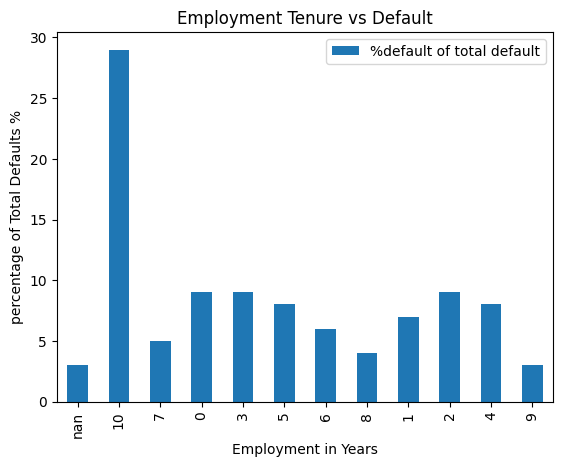

In [111]:
# Define a function to aggregate loan amount
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='emp_length',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table["%default of total default"] = round((raw_table[0]/raw_table[0].sum())*100)
raw_table["%default of Loan disbursal"] = round((raw_table[0]/(raw_table[1]+raw_table[0]))*100)
employee_length_of_default=(raw_table.sort_values(by='%default of Loan disbursal', ascending=False))

print (employee_length_of_default)
#plot
employee_length_of_default.plot(kind='bar', ylabel='percentage of Total Defaults %', xlabel='Employment in Years', y='%default of total default')
plt.title("Employment Tenure vs Default")
plt.show()

#### Undertake binning of data for sets with too much diversity

In [112]:
#undertake binning for debt to income ratio
loan.dti.describe()


count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [114]:
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [-1, 5, 10, 15, 20, 25, 30]
loan['dti_binned'] = pd.cut(loan['dti'], bins=bins, labels=bin_labels)

In [115]:
#undertake binning for loan amount
loan.funded_amnt_inv.describe()
bin_labels = ['0-10000', '5000-10000', '10000-15000', '15000-20000','20000-25000', '25000-30000','30000-35000',]
bins = [-1, 5000, 10000, 15000, 20000,25000,30000,35000]
loan['funded_amnt_inv_binned'] = pd.cut(loan['funded_amnt_inv'], bins=bins, labels=bin_labels)


In [116]:
#undertake binning for interest rate
loan.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
loan['int_rate_binned'] = pd.cut(loan['int_rate'], bins=bins, labels=bin_labels)


In [117]:
#undertake binning for annual income
loan.annual_inc.describe()
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
loan['annual_inc_binned'] = pd.cut(loan['annual_inc'], bins=bins, labels=bin_labels)


In [118]:
loan.revol_bal.describe()
#undertake binning for revolviong balance ratio
loan.revol_bal.describe()
bin_labels = ['0-25K', '25K-50K','50K-75K', '75K-100K', '100K-125K', '125K-150K', '150K+']
bins = [-1, 25000, 50000, 75000, 100000, 125000, 150000, 175000]
loan['revol_bal_binned'] = pd.cut(loan['revol_bal'], bins=bins, labels=bin_labels)


In [122]:
#undertake binning for issue_d month
bin_labels = ['Qty1', 'Qty2','Qty3', 'Qty4']
bins = [0, 1, 4, 8, 12]
loan['issue_d_month_binned'] = pd.cut(loan['issue_d_month'], bins=bins, labels=bin_labels)


#### Undertake Analysis of binned quantities

<Axes: xlabel='Annual Income', ylabel='No of Funded Investments'>

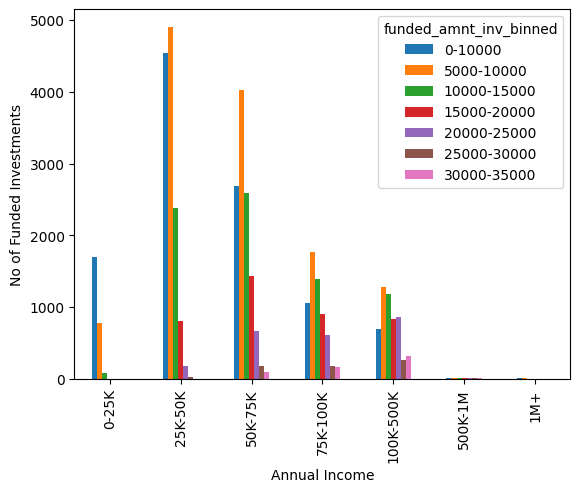

In [124]:
#analyse impact of annual income on funded loan amount
raw_table=pd.pivot_table(loan, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='No of Funded Investments', xlabel='Annual Income')


<Axes: xlabel='Annual Income', ylabel='No. of Funded Investments'>

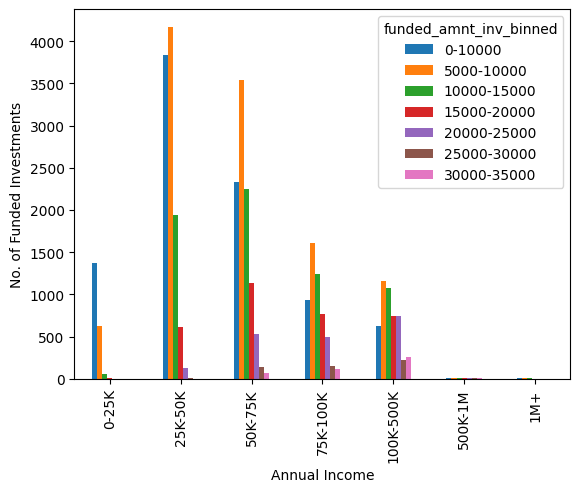

In [140]:
loan_defaulted=loan[loan.loan_status == 1]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='No. of Funded Investments', xlabel='Annual Income')


<Axes: xlabel='Annual Income', ylabel='No of Funded Investments'>

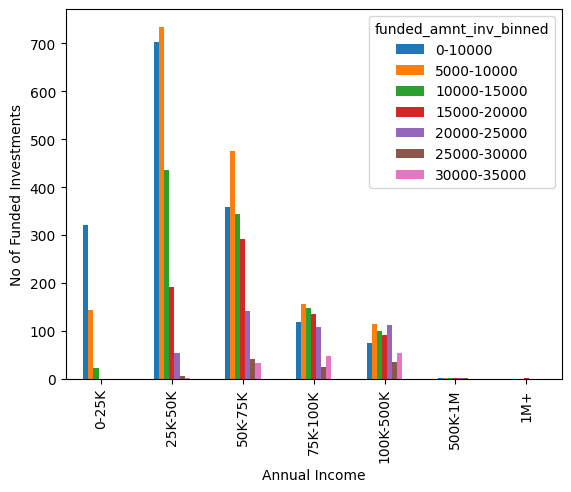

In [127]:
loan_defaulted=loan[loan.loan_status == 0]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_binned',columns='annual_inc_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='No of Funded Investments', xlabel='Annual Income')

<Axes: xlabel='Debt-Income Ratio', ylabel='Intrest Rate'>

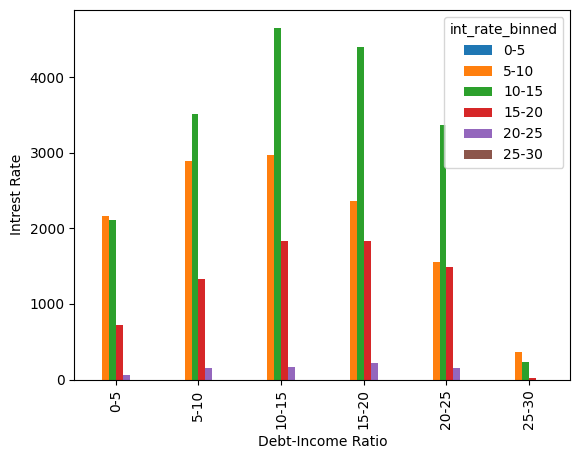

In [141]:
#undertake assessment of relationship between dti and intrest rate
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='dti_binned',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Intrest Rate', xlabel='Debt-Income Ratio')


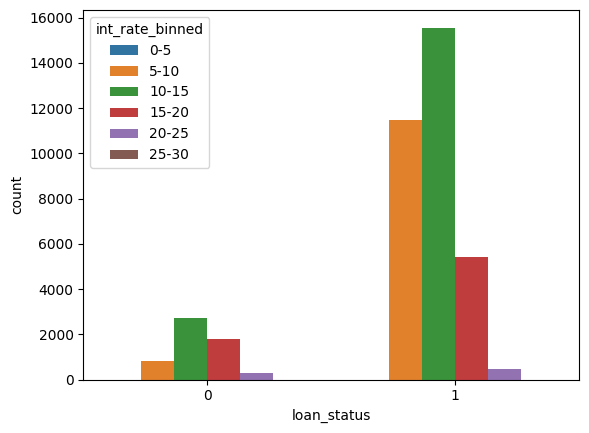

In [142]:
# count plot on two categorical variable
sb.countplot(x ='loan_status', hue = "int_rate_binned", data = loan)
 # Show the plot
plt.show()

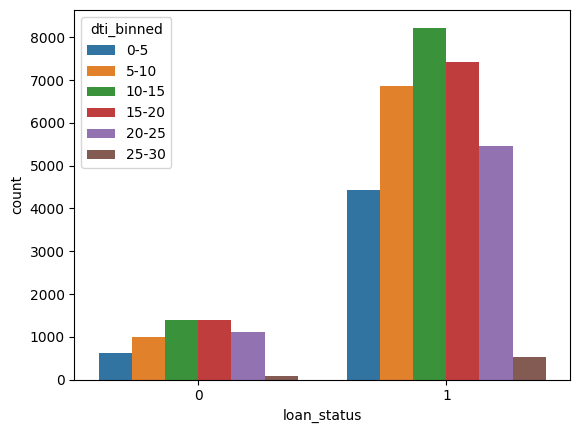

In [143]:
# count plot on two categorical variable
sb.countplot(x ='loan_status', hue = "dti_binned", data = loan)
 # Show the plot
plt.show()

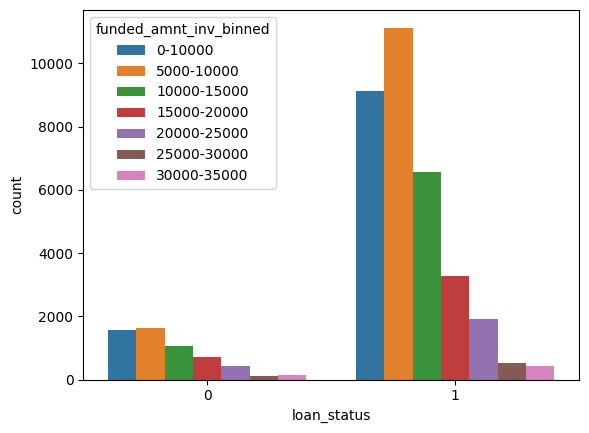

In [133]:
# count plot on two categorical variable
sb.countplot(x ='loan_status', hue = "funded_amnt_inv_binned", data = loan)
 # Show the plot
plt.show()

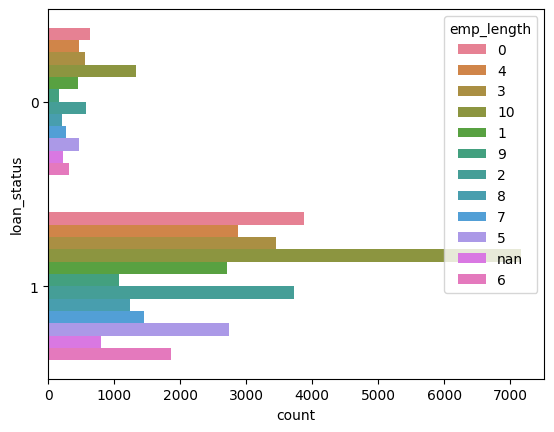

In [144]:
# count plot on two categorical variable
sb.countplot(y ='loan_status', hue = "emp_length", data = loan)
 # Show the plot
plt.show()

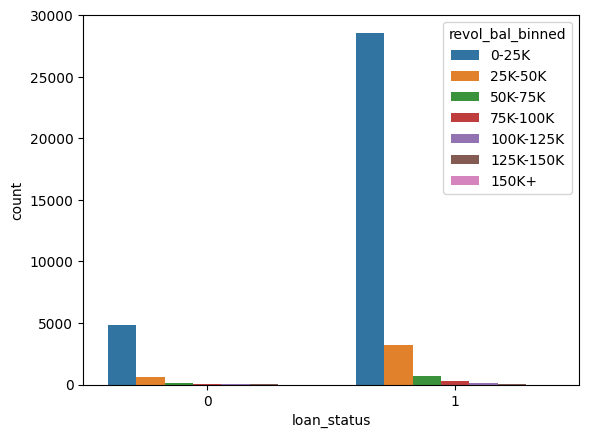

In [135]:
# count plot on two categorical variable
sb.countplot(x ='loan_status', hue = "revol_bal_binned", data = loan)
 # Show the plot
plt.show()

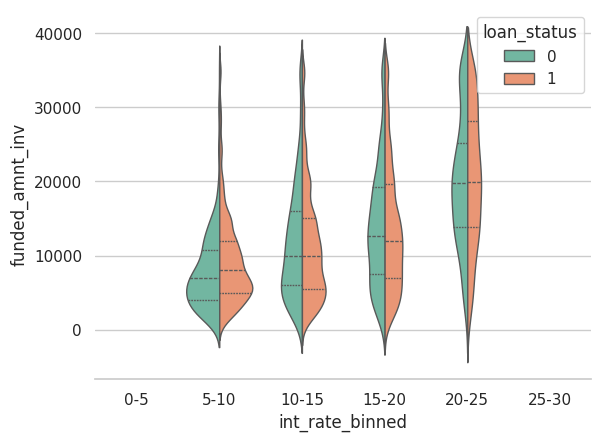

In [ ]:
sb.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sb.violinplot(data=loan, x="int_rate_binned", y="funded_amnt_inv", hue="loan_status",
               split=True, inner="quart", linewidth=1,
               palette="Set2")
sb.despine(left=True)

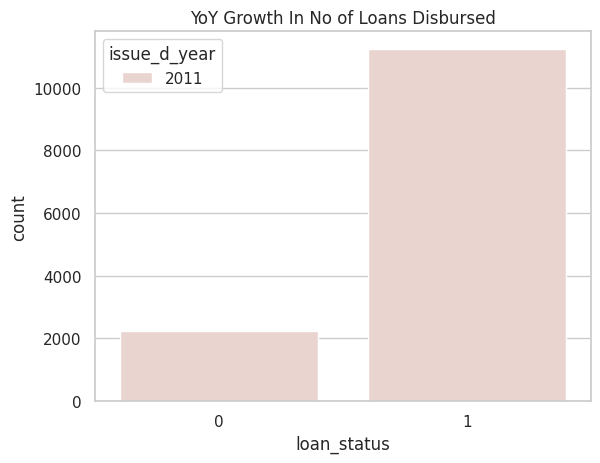

In [ ]:
# Pattern of loan disbursement
sb.countplot(x ='loan_status', hue = "issue_d_year", data = loan)
plt.title("YoY Growth In No of Loans Disbursed")

 # Show the plot
plt.show()

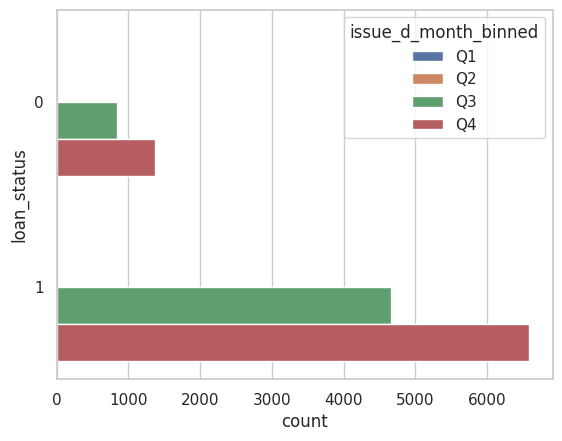

<Figure size 10000x800 with 0 Axes>

In [ ]:
# count plot on two categorical variable
sb.countplot(y ='loan_status', hue = "issue_d_month_binned", data = loan)
plt.figure(figsize=(100,8))

 # Show the plot
plt.show()

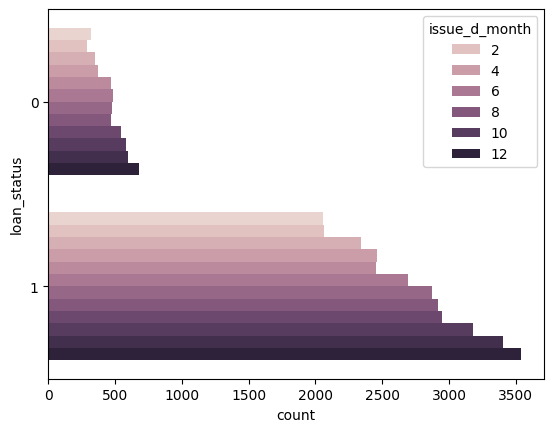

<Figure size 5000x800 with 0 Axes>

In [146]:
# count plot on two categorical variable
sb.countplot(y ='loan_status', hue = "issue_d_month", data = loan)
plt.figure(figsize=(50,8))
# Show the plot
plt.show()

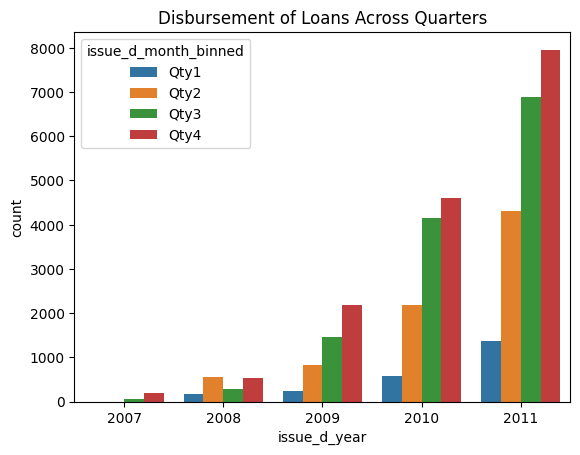

In [147]:
# Pattern of Loan Disbursement
sb.countplot(x ='issue_d_year', hue = "issue_d_month_binned", data = loan)
plt.title("Disbursement of Loans Across Quarters")
# Show the plot
plt.show()

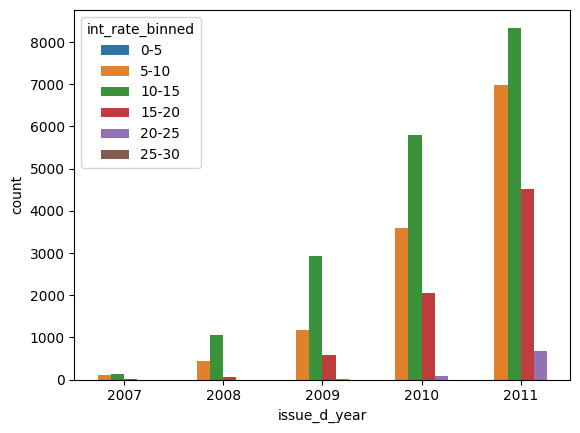

<Figure size 10000x2000 with 0 Axes>

In [148]:
# count plot on two categorical variable
sb.countplot(x ='issue_d_year', hue = "int_rate_binned", data = loan)
plt.figure(figsize=(100,20))
# Show the plot
plt.show()

              funded_amnt_inv
issue_d_year                 
2007                30.697600
2008               503.836072
2009              4109.677558
2010             11359.600818
2011             23431.453382


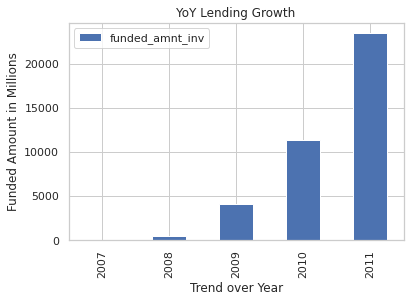

In [ ]:
#find YoY lending pattern of Lending club
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='issue_d_year',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Funded Amount in Millions', xlabel='Trend over Year')
plt.title("YoY Lending Growth")
plt.show()

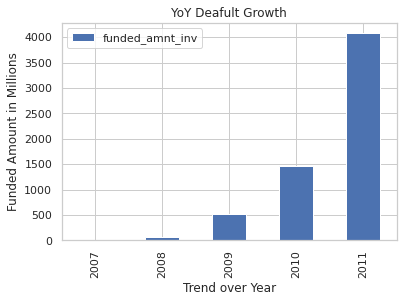

In [ ]:
#find YoY defaulting pattern of Lending club
func=lambda x : np.sum(x)/10000
loan_charged_off=loan[(loan.loan_status==0)]
raw_table=pd.pivot_table(loan_charged_off, index='issue_d_year',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Funded Amount in Millions', xlabel='Trend over Year')
plt.title("YoY Deafult Growth")
plt.show()

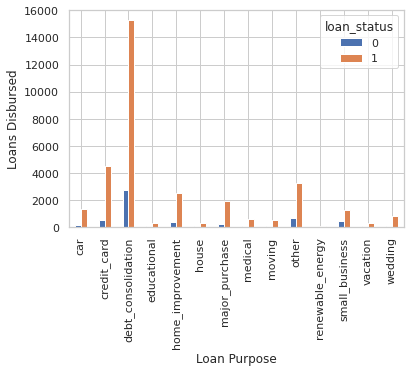

In [ ]:
#undertake assessment of relationship between purpose and loan default
raw_table=pd.pivot_table(loan, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Loans Disbursed', xlabel='Loan Purpose')
plt.show()

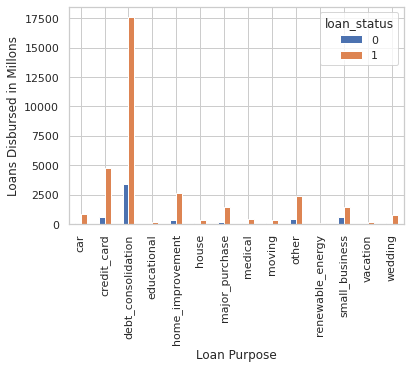

In [ ]:
#undertake assessment of relationship between purpose and loan default by value
func=lambda x : np.sum(x)/10000
raw_table=pd.pivot_table(loan, index='purpose',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Loan Purpose')
plt.show()

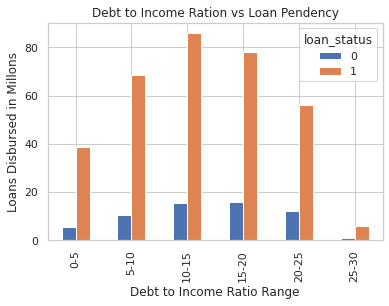

In [ ]:
#undertake assessment of relationship between purevol_balrpose and loan default by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='dti_binned',columns='loan_status',values='funded_amnt_inv',aggfunc=func)
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Debt to Income Ratio Range')
plt.title("Debt to Income Ration vs Loan Pendency")
plt.show()

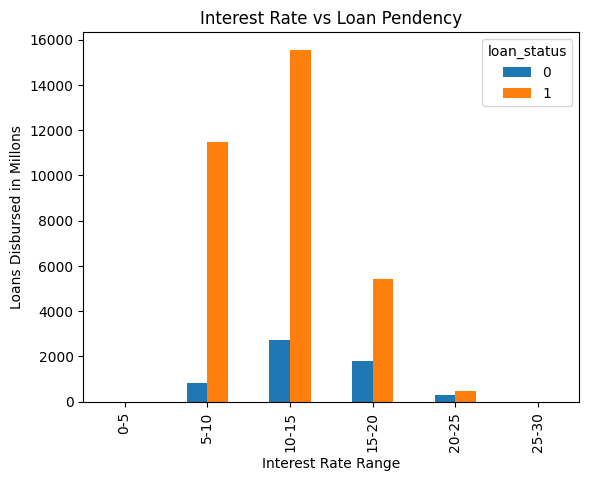

In [151]:
#undertake assessment of relationship between intrest rate and loan default by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='loan_status',values='funded_amnt_inv',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Loans Disbursed in Millons', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Loan Pendency")
plt.show()

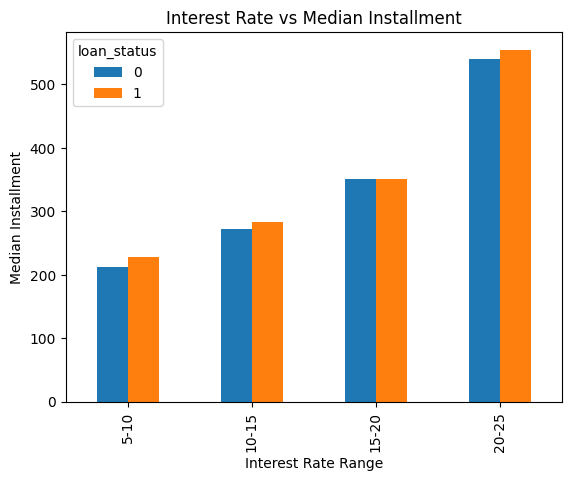

In [150]:
#undertake assessment of relationship between intrest rate and EMI by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='loan_status',values='installment',aggfunc=np.median)
raw_table.plot(kind='bar', ylabel='Median Installment', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Median Installment")
plt.show()

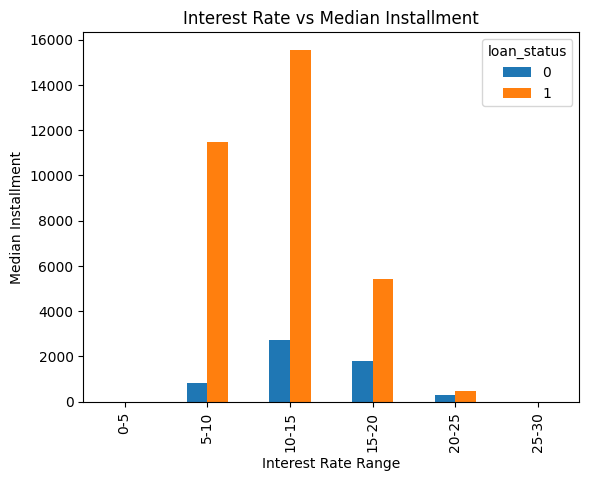

In [149]:
#undertake assessment of relationship between intrest rate and EMI by value
func=lambda x : np.sum(x)/1000000
raw_table=pd.pivot_table(loan, index='int_rate_binned',columns='loan_status',values='installment',aggfunc='count')
raw_table.plot(kind='bar', ylabel='Median Installment', xlabel='Interest Rate Range')
plt.title("Interest Rate vs Median Installment")
plt.show()

#### Undertake Multivariate Analysis